\begin{equation*}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Nor}{\mathcal{N}}
\end{equation*}




# Due Dates

* Theoretical Problems: Tuesday, November 27, in class 
* Coding: Due to the shortened week, there will be no coding problems. However,
the concepts from class will be demonstrated in code below.


# Theoretical Problems

Those diligent students that came to class know that Andy did an atrocious job of presenting
the ensemble Kalman filter. (Section 4.7 in the text.) While it is mostly Andy's fault, 
the book has several crucial inaccuracies. First we will describe the corrected equations and
the theoretical assignment will be to justify the corrections.


 $$\begin{aligned}x_{k+1} = f(x_k,u_k,w_k), \quad w_k \sim\mathcal{N}(0,Q) \\y_k =h(x_k,v_k),\quad v_k \sim\mathcal{N}(0,R) \end{aligned}$$
 
We will assume that $x_0\sim\mathcal{N}(x_0^-,P_0^-)$
 
The ensemble Kalman filter using $N$ particles is given as follows:

Initialize particle $i$ by randomly drawing:
$$ x_0^{-(0)} \sim \mathcal{N}(\hat x_0^-,P_0^-)$$

For time step $k\ge 0$, do the following:

Generate particle measurements:
$$y_k^{-(j)} = h( x_k^{-(j)},v_k^{(j)}), \quad v_k^{(j)}\sim \mathcal{N}(0,R)$$

Estimate the prior means:
\begin{align*}
\bar x_k &= \frac{1}{N} \sum_{j=1}^N  x_k^{-(j)}\\
\bar y_k &= \frac{1}{N} \sum_{j=1}^N y_k^{-(j)}
\end{align*}

Estimate the covariance matrices and gain:
\begin{align*}
P_k^{xy} &= \frac{1}{N} \sum_{j=1}^N (x_k^{-(j)} - \bar x_k)(y_k^{-(j)} - \bar y_k)^\top 
\\
P_k^{yy} &= \frac{1}{N} \sum_{j=1}^N (y_k^{-(j)} - \bar y_k)(y_k^{-(j)} - \bar y_k)^\top 
\\
K_k &= P_k^{xy} (P_k^{yy})^{-1}
\end{align*}

Measurement update:
$$
x_k^{+(j)} = x_k^{-(j)}+K_k(y_k - y_k^{-(j)})
$$

Time Update:
$$
x_{k+1}^{-(j)} = f(x_k^{+(j)},u_k,w_k^{(j)}), \quad w_k^{(j)} \sim \mathcal{N}(0,Q)
$$

The primary difference between this algorithm and the method from the book is that here the measurement noise appears in the particle measurements, $y_k^{-(j)}$. This, in turn, changes the calculation for $P_k^{yy}$. As we will see this correction leads to the desired covariance matrix.

A minor difference is that we normalized by $N$ everywhere. The book normalizes by $N-1$ everywhere. This leads to biased estimates for the mean terms. For the covariance terms, the normalization does not actually matter since the normalizing constants cancel when computing $K_k$. However, for large $N$, the differences in the normalizing factors will not change much. 

To theoretically justify the algorithm, we will assume that the system is linear, so that
\begin{align*}
x_{k+1} &= \Phi x_k + \Gamma u_k + w_k \\
y_k &= H x_k + v_k
\end{align*}
Also, for simplicity, assume that $u_k$ is deterministic. 


Let $\hat x_k^- = \E[x_k | y_{0:k-1}]$ and $P_k^- = \E[(x_k-\hat x_k^-)(x_k-\hat x_k^-)^\top ]$ 
and let $\hat x_k^+ = \E[x_k|y_{0:k}]$ and $P_k = \E[(x_k-\hat x_k^+)(x_k-\hat x_k^+)^\top]$.

We will show the following things as $N\to\infty$:
* $x_k^{-(j)}\sim \Nor(\hat x_k^-,P_k^-)$
* $x_k^{+(j)}\sim \Nor(\hat x_k^+,P_k^+)$
* $K_k \to P^-_kH^\top (HP_k^-H^\top +R)^{-1}$.
* $\bar x_k \to \hat x_k^-$.

In other words, the particles are actually samples from the filtering density. 

# Theoretical Question 0

Assume that the conditional density of $x_k^{-(j)}$ is given by $p(x_k^{-(j)}|y_{0:k-1}) = \Nor(x_k^{-(j)}|\hat x_k^-,P_k^-)$.

Show that $\E[(x_k^{-(j)}-\hat x_k^-)(y_k^{-(j)}-H \hat x_k^-)^\top] = P_k^- H^\top$
and $\E[(y_k^{-(j)}-H\hat x_k^-)(y_k^{-(j)}-H \hat x_k^-)^\top] = H P_k^- H^\top + R$.

If you can show those equalities, then for large $N$, the law of large numbers implies that 
the estimates for the covariance matrices are nearly exact, and thus the estimated gain is nearly optimal.

# Theoretical Question 1


Assume that $p(x_k^{-(j)}|y_{0:k-1}) = \Nor(x_k^{-(j)}|\hat x_k^-,P_k^-)$ and assume that $K_k = P_k^- H^\top (H P_k^- H^\top +R)^{-1}$. In other words, we are assuming that the gain is optimal.

Show that $\E[x_k^{+(j)}|y_{0:k}] = \hat x_k^+$ and $\E[(x_k^{+(j)}-\hat x_k^+)(x_k^{+(j)}-\hat x_k^+)^\top | y_{0:k}] = P_k^+$.

If you can show these equalities, it follows that $p(x_k^{+(j)}|y_{0:k})=\Nor(x_k^{+(j)}|\hat x_k^+,P_k^+)$.

# Theoretical Question 2

Assume that $p(x_k^{+(j)}|y_{0:k})=\Nor(x_k^{+(j)}|\hat x_k^+,P_k^+)$. 

Show that $\E[x_{k+1}^{-(j)}|y_{0:k}] = \hat x_{k+1}^-$ and 
$\E[(x_{k+1}^{-(j)}-\hat x_{k+1}^-)(x_{k+1}^{-(j)}-\hat x_{k+1}^-)^\top|y_{0:k}] = P_{k+1}^-$.

If you can show these equalities, it follows that $p(x_{k+1}^{-(j)}|y_{0:k})=\Nor(x_{k+1}^{-(j)}|\hat x_{k+1}^-,P_{k+1}^-)$.

Combining all of the results from the theoretical questions shows that the particles sample from 
the filtering density, by induction.




In [1]:
# This is code to load the assignment.
# You'll need to run this code do or restart the assignment.
from loadAssignment import loadAssignment
Assignment, Questions, Submit, Data = loadAssignment(9)

# These are modules that we need
# once you run this code, you don't need to load them again
import autograd.numpy as np
import autograd as ag
import scipy.linalg as la
import scipy.signal as sp
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline


Here is some code that may be helpful. 



In [2]:
# Helper functions 
def dot(*mats):
    """
    Computes product of arbitrary matrices
    """
    
    if len(mats) == 1:
        return mats[0]
    else:
        return np.dot(mats[0],dot(*mats[1:]))




# Question 0




In [3]:
# Helper functions 
def dot(*mats):
    """
    Computes product of arbitrary matrices
    """
    
    if len(mats) == 1:
        return mats[0]
    else:
        return np.dot(mats[0],dot(*mats[1:]))


# Gaussian Sum Filter Example

Here is a simple example of the Gaussian sum filter applied to 

\begin{align*}
 x_{k+1} &= x_k + u_k + .1 * w_k \\
 y_k &= |x_k| + .5 (|x_k| + .1) v_k
\end{align*}

We assume a density of the form $p(x_k|y_{0:k}) = \sum_{i=1}^N w_k^{(i)}\Nor(x_k |\hat x_k^{+(i)},P_k^{+(i)})$.

The plots show how the density evolves as more data is collected.



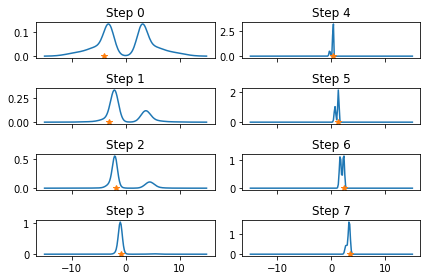

In [4]:
# Helper functions 
def dot(*mats):
    """
    Computes product of arbitrary matrices
    """
    
    if len(mats) == 1:
        return mats[0]
    else:
        return np.dot(mats[0],dot(*mats[1:]))

def step(x,u,w):
    return x + u + .1 * w

def measure(x,v):
    return np.abs(x) + .5 * (np.abs(x) + .1) * v


dfdx = ag.jacobian(step,argnum=0)
dfdw = ag.jacobian(step,argnum=2)

dhdx = ag.jacobian(measure,argnum=0)
dhdv = ag.jacobian(measure,argnum=1)

NumModes = 6
n = 1

var0 = 5.
mu_list = np.linspace(-10,10,NumModes).reshape((NumModes,n))
P_list = np.array([var0 * np.eye(n) for _ in range(NumModes)])
Weights = np.ones(NumModes) / NumModes

def mixturePdf(x,mu_list,P_list,Weights):
    pdf = np.zeros_like(x)
    for mu,P,w in zip(mu_list,P_list,Weights):
        pdf += w * st.norm.pdf(x,loc=mu[0],scale=np.sqrt(P[0,0]))
        
    return pdf

def mixtureRvs(mu_list,P_list,Weights):
    ind = rnd.choice(np.arange(len(Weights)),p=Weights)
    mu = mu_list[ind]
    P = P_list[ind]
    
    CP = la.cholesky(P,lower=True)
    
    n = len(mu)
    return np.dot(CP,rnd.randn(n)) + mu
    

NumSteps = 8

fig,ax = plt.subplots(int(NumSteps/2),2,sharex=True)



W = rnd.randn(NumSteps,n)
V = rnd.randn(NumSteps,n)

x = np.array([-4])

U = 1 * np.ones((NumSteps,n))

x_plot = np.linspace(-15,15,200)

for k in range(NumSteps):
    w = W[k]
    v = V[k]
    u = U[k]
    
    # Update
    y = measure(x,v)
    
    Weights_pre = np.zeros_like(Weights)
    
    for i in range(NumModes):
        mu = mu_list[i]
        P = P_list[i]
        H = dhdx(mu,np.zeros(n))
        J = dhdv(mu,np.zeros(n))
        Psi = dot(H,P,H.T) + np.dot(J,J.T)
        
        y_guess = measure(mu,np.zeros(n))
        likelihood = st.multivariate_normal.pdf(y,mean=y_guess,cov=Psi)
        Weights_pre[i] = Weights[i] * likelihood
        
        K = la.solve(Psi,np.dot(H,P)).T
        mu_list[i] = mu + np.dot(K,y-y_guess)
        P_list[i] = P - dot(K,Psi,K.T)
        
    Weights = Weights_pre / np.sum(Weights_pre)
    pdf_plot = mixturePdf(x_plot,mu_list,P_list,Weights)
    ax[k % int(NumSteps/2),int( 2 * k/NumSteps)].plot(x_plot,pdf_plot)
    ax[k % int(NumSteps/2),int(2 * k/NumSteps)].plot(x[0],0,'*')
    ax[k % int(NumSteps/2),int(2 * k/NumSteps)].set_title('Step %d' % k)
    
    for i in range(NumModes):
        mu_post = mu_list[i]
        P_post = P_list[i]
        # Prediction
        F = dfdx(mu_post,u,np.zeros(n))
        G = dfdw(mu_post,u,np.zeros(n))
        
        mu_list[i] = step(mu_post,u,np.zeros(n))
        P_list[i] = np.dot(G,G.T) + dot(F,P_post,F.T)
        
        
     
    x = step(x,u,w)
        
        
plt.tight_layout()


# Ensemble Kalman Filter Example

Below we will similulate a system of coupled nonlinear oscillators.

Here the system has $100$ oscillators, arranged on a $10\times 10$ lattice. Since each oscillator
is a second-order system, the state dimension is $200$. 

We will assume that $10$ of the oscillators (chosen at random) are measured. We will construct
an estimate of the full state using the ensemble Kalman filter.

The first bit of code here is just the simulation.



Text(0.5, 1.0, 'Measurements')

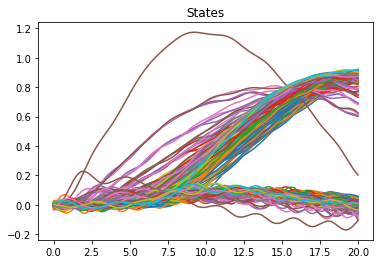

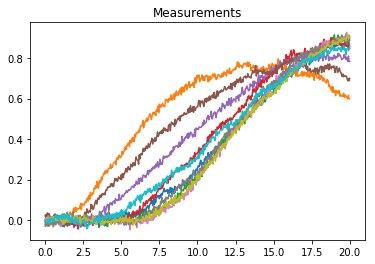

In [5]:
n = 10

AllIndices = np.arange(n**2)

Neighbors = {i : [] for i in AllIndices }


for i in AllIndices:
    ri,ci = np.unravel_index(indices=i,dims=(n,n))
    for j in AllIndices:
        rj,cj = np.unravel_index(indices=j,dims=(n,n))
        
        if (np.abs(ri-rj) + np.abs(ci-cj) == 1) and (i < j):
            Neighbors[i].append(j)
            Neighbors[j].append(i)

NumSteps = 500
Time = np.linspace(0,20,NumSteps)
dt = Time[1] - Time[0]

def oscillatorStep(x,u,w):
    sig_w = .001
    zeta = .1
    omega_nat = 1.
    K_spring = omega_nat**2
    K_damping = 2 * zeta * omega_nat 
    N = int(len(x)/2)
    n = int(np.round(np.sqrt(N)))
    q = x[:N]
    dq = x[N:]
    
    
    
    q_dot = np.copy(dq)
    dq_dot = -K_damping * dq + omega_nat**2 * sig_w * w/np.sqrt(dt)
    for i in range(N):
        dq_dot[i] -=  K_spring * np.sum(np.sin(q[i] - q[Neighbors[i]] ))
    
    inputInd = np.ravel_multi_index(multi_index=(int(n/2),int(n/2)),dims=(n,n))
    
    dq_dot[inputInd] += omega_nat**2 * u[0]
    
    return x + dt * np.hstack([q_dot,dq_dot])

NumSensors = n

SensorIndices = rnd.permutation(np.arange(n**2))[:n]

def measureOscillator(x,v):
    return x[SensorIndices] + .01 * v

sig_x = .01
x = sig_x * rnd.randn(2*n**2)

X = []


U = 2 * np.sin(.2 * Time).reshape((len(Time),1))

for k in range(NumSteps):
    X.append(x)
    u =U[k]
    x = oscillatorStep(x,u,rnd.randn(n**2))

X =np.array(X)

Y = np.array([measureOscillator(x,v) for x,v in zip(X,rnd.randn(len(X),NumSensors))])
    
    
plt.plot(Time,X)
plt.title('States')
plt.figure()
plt.plot(Time,Y)
plt.title('Measurements')


The next bit is the actual ensemble Kalman filter.



Text(0.5, 1.0, 'Estimation Errors')

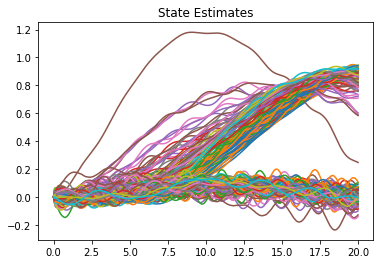

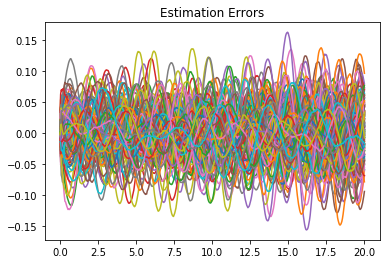

In [6]:
NumParticles = 20

X_ens = []

for _ in range(NumParticles):
    x = sig_x * rnd.randn(2*n**2)
    X_ens.append(x)
    
    
X_ens = np.array(X_ens)

X_est = np.zeros((NumSteps,2*n**2))
for k in range(NumSteps):
    # Particle measuremnts
    Y_ens = np.array([measureOscillator(x,rnd.randn(NumSensors)) for x in X_ens])
    
    # Prior Means
    x_pre = np.mean(X_ens,axis=0)
    y_pre = np.mean(Y_ens,axis=0)
    
    # Just using the prior estimate for simplicity
    # This corresponds to \bar{x}_k
    X_est[k] = x_pre
        
    # Covariance Matrices
    Pxy = np.zeros((len(x),NumSensors))
    Pyy = np.zeros((NumSensors,NumSensors))
    
    for x,y in zip(X_ens,Y_ens):
        res_x = x - x_pre
        res_y = y - y_pre
        
        Pxy += np.outer(res_x,res_y) /(NumParticles-1)
        Pyy += np.outer(res_y,res_y) / (NumParticles-1)
        
    # Gain    
    K = la.solve(Pyy,Pxy.T).T
    
    for i in range(NumParticles):
        x = X_ens[i]
        y = Y_ens[i]
        # Measurement Update
        x = x + np.dot(K,Y[k]-y)
        # Time Update
        x = oscillatorStep(x,U[k],rnd.randn(n**2))
        X_ens[i] = x
        
plt.plot(Time,X_est)
plt.title('State Estimates')
plt.figure()
plt.plot(Time,X_est - X)
plt.title('Estimation Errors')


# Final Score

You can run this code to see all of your scores.




In [7]:
Assignment.showResults()


Total: 0 / 0





# Submission

Save your work and run this cell to submit. It will only work if you have the internet.

